In [1]:
import pandas as pd

In [2]:
import datetime

In [3]:
from datetime import datetime

In [4]:
import matplotlib.pyplot as plt

In [5]:
import re


In [170]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [171]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 1.  Хочу посмотреть в каких годах активность пользователей была наибольшей

In [172]:
# ratings.head()

In [173]:
ratings.timestamp = ratings['timestamp'].agg([datetime.fromtimestamp])          
#ratings.head()               

In [174]:
#  переведем timestamp в просто год
def year_ (timestamp):
    return timestamp.year

In [175]:
ratings['timestamp'] = ratings['timestamp'].apply(year_)

In [176]:
#ratings.head()

In [177]:
# переименнуем столбец 
ratings.rename(columns={'timestamp': 'year'},inplace=True)

In [178]:
ratings.head()

,userId,movieId,rating,year
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009


In [179]:
# сделаем группировку по year и выясним самые активные года по выставлению оценок
ratin_index = (ratings
              .groupby('year')
              .count()[['rating']]
              .sort_values('rating', ascending=False)
              .reset_index()
             )
ratin_index.head()

,year,rating
0,2000,13869
1,2006,7493
2,2005,7161
3,2015,6610
4,1996,6239


<BarContainer object of 22 artists>

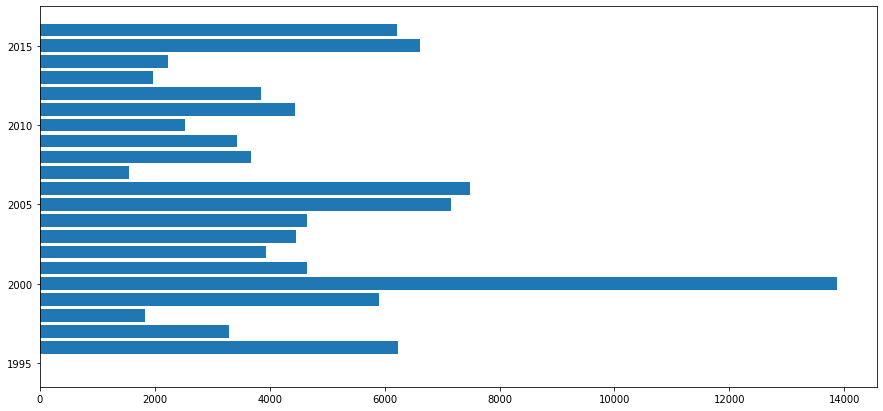

In [180]:
#  это в случае , когда есть индексы
plt.barh(ratin_index['year'], ratin_index['rating'])

В 2000 году активность пользователей значительно выше чем в другие года.

### 2. Посмотрим сколько фильмом было выпущено в каждом году.

In [181]:
# подготовим верхний дф
ratin_year = (ratings
              .groupby('year')
              .count()[['rating']]
             )
ratin_year.head()
#len(ratin_year)

,rating
year,
1995,3
1996,6239
1997,3294
1998,1825
1999,5901


In [182]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [183]:
# создаем регулярное выражение на проверку года
regex_year = '\(\d{4}\)'


In [184]:
# функция, которая из названия получит год, если год не указан проставит 1900
def production_year (title):
    t_year = title.split(' ')
    
    if re.findall(regex_year,t_year[-1]):
        return (t_year[-1])
    else:
        return ('(1900)')

In [185]:
movies['year'] = movies['title'].apply(production_year)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [186]:
def year_ (year):
    y = re.sub(r'(\()(\d{4})(\))',r'\2', year)
    return (int(y))

In [187]:
# убрали скобки и перевели в число
movies['year'] = movies['year'].apply(year_)
#movies.head()
movies.tail()

,movieId,title,genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,1900


In [188]:
#  получаем сортировку по годам количество выпущенных фильмом и оставляю нужные столбцы
movies_year = (movies
               .groupby('year')
               .count()
               #.sort_values('movieId', ascending=False)
               .filter(items = ['year', 'movieId'])
               #.reset_index()
              )
             
movies_year.head()

,movieId
year,
1900,11
1902,1
1915,1
1916,2
1917,1


In [189]:
# ratin_year короче дф - он будет основной,
# и я хочу посмотреть есть ли связь с всплеском  активностью пользователей и выходом новых фильмом 

#years_akti_movies = ratin_year.merge(movies_year, on= 'year', how= 'left')
years_akti_movies = ratin_year.join(movies_year, on= 'year', how= 'left')

In [190]:
years_akti_movies.head()

,rating,movieId
year,,
1995,3,266
1996,6239,275
1997,3294,267
1998,1825,272
1999,5901,261


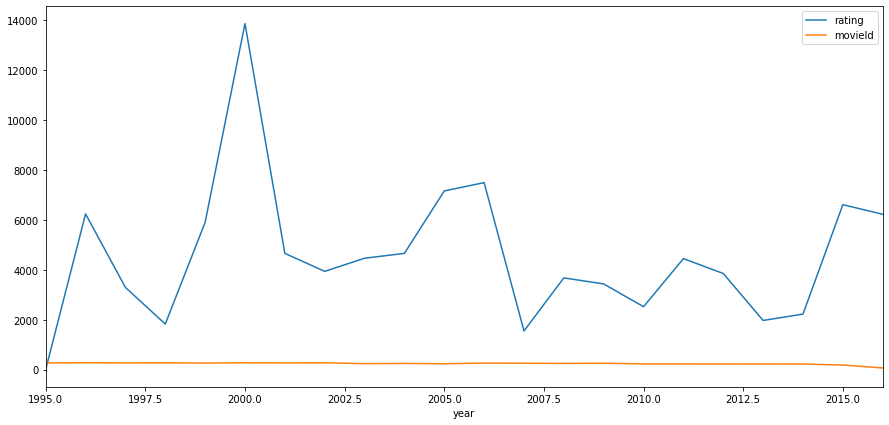

In [191]:
years_akti_movies.plot()

In [192]:
# попробую сделать нагляднее график 
years_akti_movies['movieId'] = years_akti_movies['movieId']*30
years_akti_movies['rating'] = years_akti_movies['rating']*0.80

In [193]:
years_akti_movies.head()

,rating,movieId
year,,
1995,2.4,7980
1996,4991.2,8250
1997,2635.2,8010
1998,1460.0,8160
1999,4720.8,7830


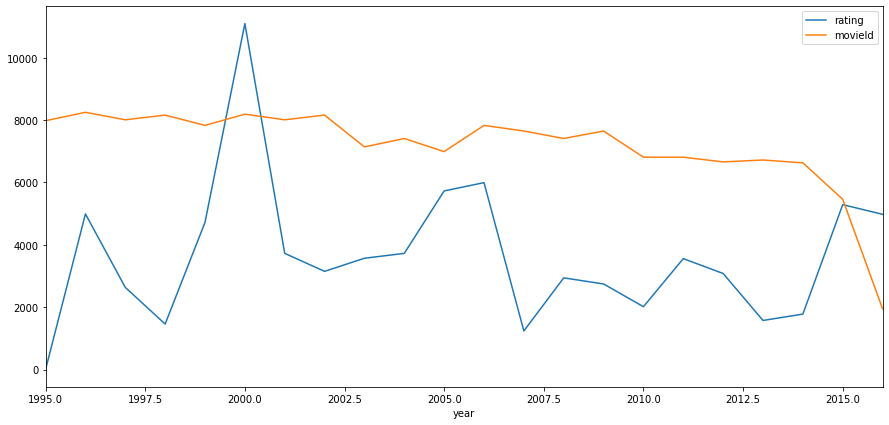

In [194]:
years_akti_movies.plot()

Надеялась увидеть , что в районе 2000-ого года было больше фильмом выпущено и поэтому был всплеск активности пользователей, но нет не увидела. Количество выпускаемых фильмом достаточно ровное  в эти года (1990-2002).

### 3. Посмотрим какие оценки были поставлены в этот период пользователями

In [195]:
ratings.head()

,userId,movieId,rating,year
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009


In [196]:
# оставила три столбца: rating перевела в целое число,
#столбец userId присваиваю значение 1 для дальнейшего подсчета 
rating = ratings.filter(items =['rating', 'year', 'userId'])
rating['rating'] = rating.rating.astype('int64') 
rating.userId = 1
rating.head()

,rating,year,userId
0,2,2009,1
1,3,2009,1
2,3,2009,1
3,2,2009,1
4,4,2009,1


In [197]:
#rating = rating.groupby('year').groupby('rating')
#rating.unstack('rating')
rating = rating.pivot_table(values=['userId'], index = ['year'], columns = ['rating'], aggfunc = sum)

In [198]:
rating.head(22)

userId                                       
rating      0      1       2       3       4       5
year                                                
1995      NaN    NaN     NaN     2.0     NaN     1.0
1996      NaN  167.0   360.0  2494.0  2023.0  1195.0
1997      NaN   93.0   191.0  1268.0  1044.0   698.0
1998      NaN   68.0   275.0   472.0   561.0   449.0
1999      NaN  207.0   535.0  1496.0  2228.0  1435.0
2000      NaN  776.0  1343.0  3145.0  5172.0  3433.0
2001      NaN  249.0   548.0  1367.0  1611.0   883.0
2002      NaN  375.0   521.0  1118.0  1312.0   611.0
2003     68.0  270.0   583.0  1371.0  1657.0   514.0
2004     79.0  263.0   632.0  1777.0  1634.0   273.0
2005    121.0  295.0   846.0  2129.0  2901.0   869.0
2006    108.0  316.0   836.0  2611.0  3047.0   575.0
2007     25.0   67.0   210.0   551.0   600.0    95.0
2008     41.0  212.0   505.0  1141.0  1453.0   324.0
2009    145.0  171.0   495.0  1262.0  1078.0   281.0
2010     30.0   87.0   251.0   747.0  1033.0   372.0
2011     78.0  209.0   726.0  1662.0  1434.0   339.0
2012     65.0  166.0   372.0  1265.0  1560.0   423.0
2013     22.0   92.0   269.0   588.0   723.0   275.0
2014     65.0  122.0   295.0   711.0   861.0   170.0
2015    148.0  307.0   785.0  1812.0  2469.0  1089.0
2016    106.0  501.0  1142.0  1613.0  2072.0   791.0

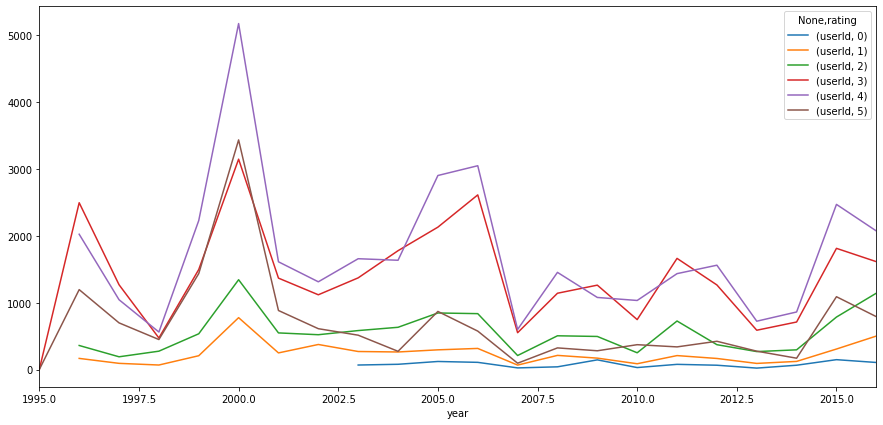

In [199]:
rating.plot()

По данному графику прослеживается та же тенденция, что в 2000 году и оценки были выше и больше по количеству.  Но на какие фильмы, год выпуска, они были поставлены, интересно!

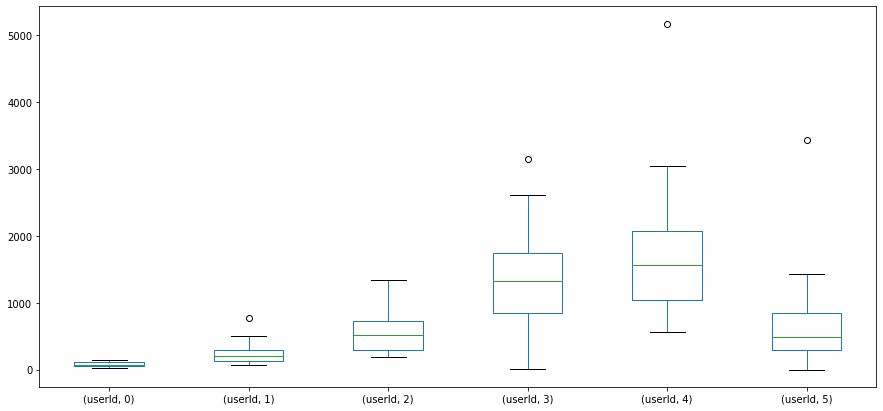

In [200]:
rating.plot(kind='box')

 Не уверена, что могу правильно интерпретировать , но считаю , что по данному графику видно , что больше оценок по количеству поставлено 4, потом 3 , 2 и 5 . Это я сужу по медиане каждой коробки.  

### 4 Фильмы получившие наибольшее количество оценок 5

In [149]:
# отфильтрую только оценки 5 
ratings_5 = ratings.query('rating==5')
ratings_5

,userId,movieId,rating,timestamp
21,2,17,5.0,835355681
22,2,39,5.0,835355604
29,2,150,5.0,835355395
37,2,222,5.0,835355840
44,2,265,5.0,835355697
...,...,...,...,...
99975,671,4306,5.0,1064245548
99978,671,4886,5.0,1064245488
99979,671,4896,5.0,1065111996
99982,671,4993,5.0,1064245483


In [150]:
# сгруппировала в один файл по movieId
ratings_5 = ratings_5.merge(movies, on= 'movieId', how= 'left')
ratings_5

,userId,movieId,rating,timestamp,title,genres
0,2,17,5.0,835355681,Sense and Sensibility (1995),Drama|Romance
1,2,39,5.0,835355604,Clueless (1995),Comedy|Romance
2,2,150,5.0,835355395,Apollo 13 (1995),Adventure|Drama|IMAX
3,2,222,5.0,835355840,Circle of Friends (1995),Drama|Romance
4,2,265,5.0,835355697,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance
...,...,...,...,...,...,...
15090,671,4306,5.0,1064245548,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...
15091,671,4886,5.0,1064245488,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
15092,671,4896,5.0,1065111996,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
15093,671,4993,5.0,1064245483,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy


In [151]:
ratings_5= (ratings_5
            .groupby('title')
            .count()[['rating']]
            .sort_values('rating', ascending=False)
            #.reset_index()
           ).head(10)
ratings_5

,rating
title,
"Shawshank Redemption, The (1994)",170
Pulp Fiction (1994),138
Star Wars: Episode IV - A New Hope (1977),122
Schindler's List (1993),109
"Godfather, The (1972)",107
Forrest Gump (1994),102
Fargo (1996),100
"Silence of the Lambs, The (1991)",100
"Matrix, The (1999)",95


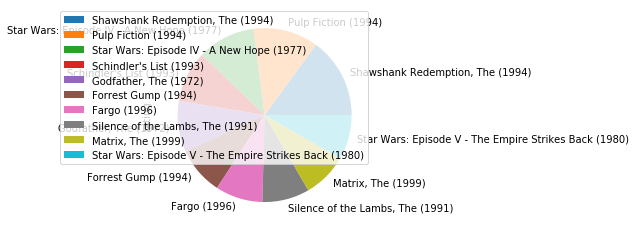

In [152]:
ratings_5.plot(kind='pie', y='rating')

In [156]:
from pylab import rcParams
rcParams['figure.figsize']= 15,7

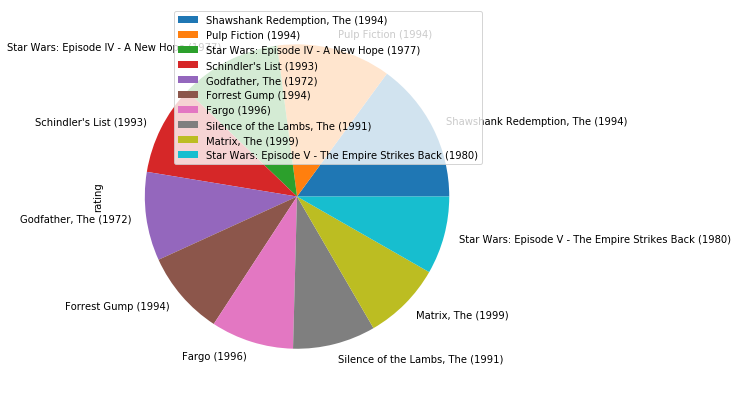

In [157]:
ratings_5.plot(kind='pie', y='rating')

Опираясь все же больше на цифры,  чем на данную диаграмму , мы видим что высшие баллы получили фильмы не относящие к году выпуска 2000. Я делаю вывод из всех таблиц, что всплеск активности пользователей был вызван разширением возможности  смотреть через интернет старые фильмы (наиболее популярные и действительно гениальные) и плюс активно смотрели и оценивали текущие новинки. Расширение возможности интернета,  доступности фильмом и возможность принимать участия в оценке фильма! 